<a href="https://colab.research.google.com/github/Monideepa28/ML/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Introduction***

Welcome to Basic Image Classification with TensorFlow.


In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as TF

print("TensorFlow version:", TF.__version__)

TensorFlow version: 2.12.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Task 2: DATASET***

Import dataset

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Shapes of imported array

In [ ]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


Plot an Image ex

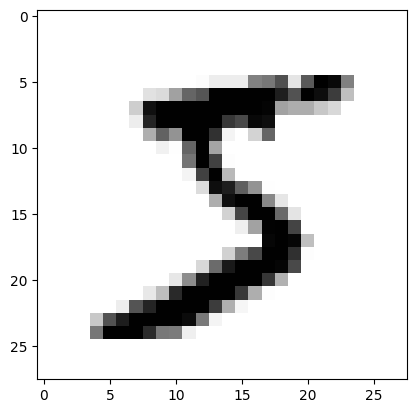

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[0], cmap='binary')
plt.show()

Display labels

In [ ]:
y_train[0]

5

In [ ]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# ***Task3:  One Hot Encodin***g

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

Validated Shapes

In [ ]:
print('y_train_encoded shape:',y_train_encoded.shape)
print('y_test_encoded shape:',y_test_encoded.shape)

y_train_encoded shape: (60000, 10)
y_test_encoded shape: (10000, 10)


Display Encoded Labels

In [ ]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# ***Task 4: Neural Networks***

# ***Task 5:  preprocessing the ex***

Unrolling N-dimensional array to vectors

In [ ]:
import numpy as np
x_train_reshaped = np.reshape(x_train,(60000, 784))
x_test_reshaped = np.reshape(x_test,(10000, 784))
print('x_train_reshaped shape:', x_train_reshaped.shape)
print('x_test_reshaped shape:', x_test_reshaped.shape)

x_train_reshaped shape: (60000, 784)
x_test_reshaped shape: (10000, 784)


Display pixel values

In [ ]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


Data Normalization

In [ ]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)
epsilon = 1e-10
x_train_norm =(x_train_reshaped-x_mean)/(x_std + epsilon)
x_test_norm =(x_test_reshaped-x_mean)/(x_std + epsilon)

Display  Normalize pixel values

In [ ]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# ***Task 6: Creating a Model***



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential ([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

Compiling the model

In [ ]:
model.compile(
    optimizer='SGD',
    loss='CategoricalCrossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# ***Task 7:Training the Model***

Training the Model

In [ ]:
model.fit(x_train_norm, y_train_encoded, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3628 - accuracy: 0.8960
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1791 - accuracy: 0.9485
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1370 - accuracy: 0.9599


Evaluatig the model

In [ ]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('Test set accuracy :', accuracy * 100)

313/313 [==============================] - 0s 1ms/step - loss: 0.1255 - accuracy: 0.9629
Test set accuracy : 96.28999829292297


# ***Task8 : Predictions***

predictions on Test Set

In [ ]:
preds=model.predict(x_test_norm)
print('Shape of Preds: ',preds.shape)

313/313 [==============================] - 0s 996us/step
Shape of Preds:  (10000, 10)


Plotting the result

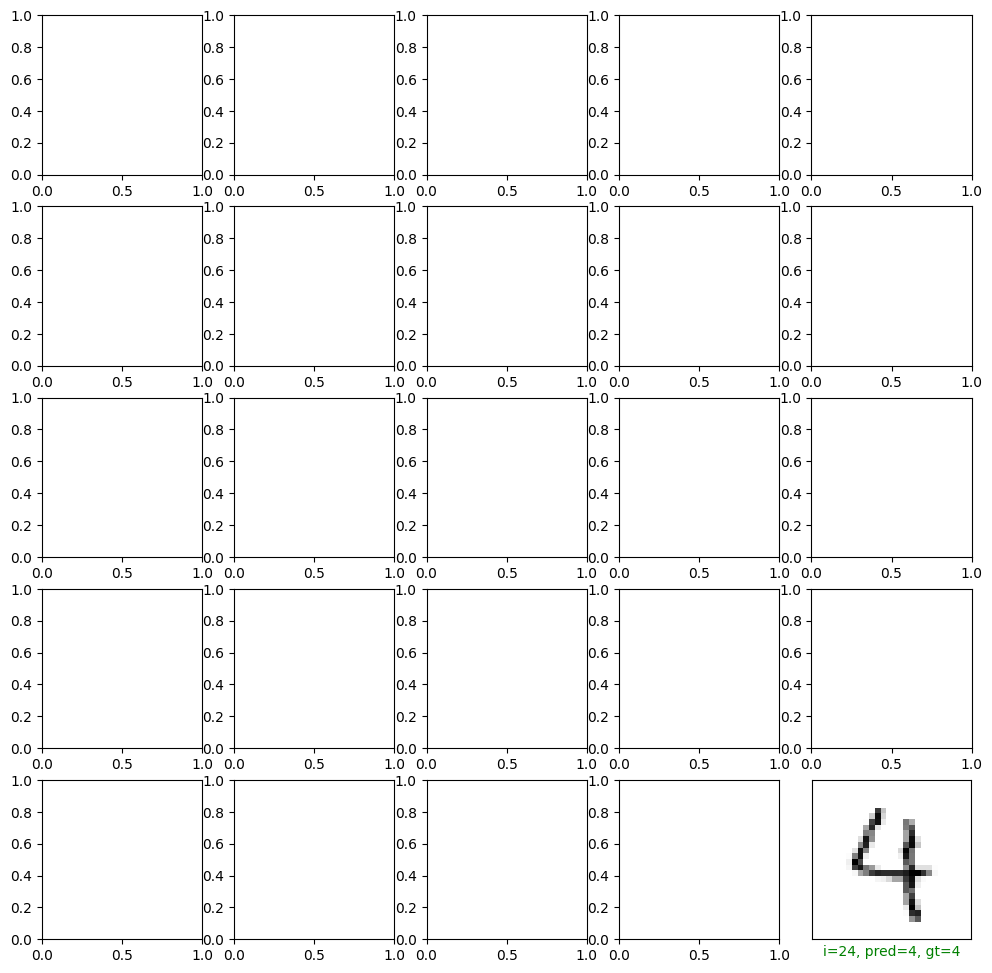

In [ ]:
plt.figure(figsize=(12, 12))
start_index=0
for i in range(25):
  plt.subplot(5, 5, i+1)
plt.grid(False)
plt.xticks([])
plt.yticks([])
pred = np.argmax(preds[start_index+i])
gt=y_test[start_index+i]
col='g'
if pred!=gt:
  pol='r'
plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i, pred, gt), color=col)
plt.imshow(x_test[start_index+i], cmap='binary')
plt.show()

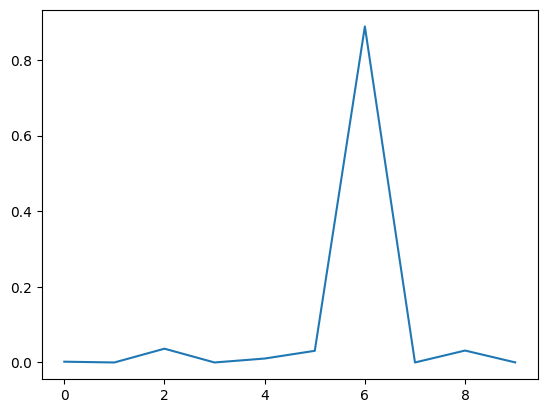

In [ ]:
plt.plot(preds[8])
plt.show()